In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
momemta_out = '/home/zbhatti/codebase/madminer/examples/higgs_4l/momemta/weights1.csv'
observations_local = '/scratch/madminer_data/data/miner_lhe_data_shuffled.h5'
observations = h5py.File(observations_local, mode='r')
print observations['benchmarks']['values'][:]
print type(observations['benchmarks']['values'][0][0])
print observations['benchmarks']['values'][:].shape

[[-5.        ]
 [-4.7349485 ]
 [-4.469897  ]
 [-4.2048455 ]
 [-3.939794  ]
 [-3.6747425 ]
 [-3.409691  ]
 [-3.1446395 ]
 [-2.879588  ]
 [-2.6145365 ]
 [-2.349485  ]
 [-2.0844335 ]
 [-1.819382  ]
 [-1.5543305 ]
 [-1.289279  ]
 [-1.0242275 ]
 [-0.759176  ]
 [-0.4941245 ]
 [-0.229073  ]
 [ 0.0359785 ]
 [ 0.30103   ]
 [ 0.        ]
 [-2.39794001]]
<type 'numpy.float64'>
(23, 1)


In [2]:
momemta_results = np.genfromtxt(momemta_out, delimiter=",", autostrip=True)
print momemta_results[0,:-1] 
widths = momemta_results[0,:-1]
ratios = momemta_results[1:,:-1]

[1.00000e-05 3.38925e-05 1.14870e-04 3.89322e-04 1.31951e-03 4.47214e-03
 1.51572e-02 5.13714e-02 1.74110e-01 2.00000e+00 4.00000e-03]


In [3]:
print widths

[1.00000e-05 3.38925e-05 1.14870e-04 3.89322e-04 1.31951e-03 4.47214e-03
 1.51572e-02 5.13714e-02 1.74110e-01 2.00000e+00 4.00000e-03]


In [4]:
ratios.shape

(100, 11)

In [5]:
average_ratios = np.mean(ratios, axis=0)
average_ratios

array([3.48312289e+06, 2.87951658e+06, 1.25430786e+06, 3.96585117e+05,
       1.07755458e+05, 2.24266939e+04, 3.23179597e+03, 3.45428391e+02,
       3.22114655e+01, 2.50557980e-01, 2.62508957e+04])

In [6]:
widths

array([1.00000e-05, 3.38925e-05, 1.14870e-04, 3.89322e-04, 1.31951e-03,
       4.47214e-03, 1.51572e-02, 5.13714e-02, 1.74110e-01, 2.00000e+00,
       4.00000e-03])

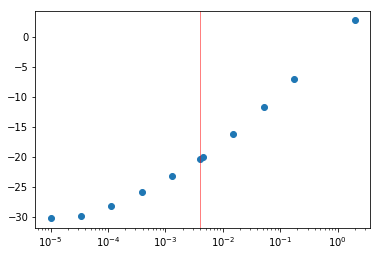

In [7]:
plt.plot(widths, -2*np.log(average_ratios), 'o')
plt.axvline(x=4E-3, color='red', linewidth=0.5) # expected global minimum
plt.xscale('log')